## Final Project Submission

Please fill out:
* Student name: MERCY MORAA ONDUSO
* Student pace: part time
* Scheduled project review date/time: 
* Instructor name: Noah Kandie
* Blog post URL:


In [ ]:
# Your code here - remember to use markdown cells for comments as well!

# 1.0 Business Understanding

The stakeholders of the real estate agency are looking to assist homeowners improve their sales. By doing this, they are encouraging homeowners to do renovations of their homes so that interested clients can have an easier route to purchasing. The renovations will not only make purchasing of the homes easier but will also improve the estimated value of their homes

In [32]:
#import the libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [33]:
housing_data = pd.read_csv("E:\Data Science\Linear Regression Analysis files\kc_house_data.csv")
housing_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.00000,3,1.00000,1180,5650,1.00000,NAN,0.00000,...,7,1180,0.0,1955,0.00000,98178,47.51120,-122.25700,1340,5650
1,6414100192,12/9/2014,538000.00000,3,2.25000,2570,7242,2.00000,0.00000,0.00000,...,7,2170,400.0,1951,1991.00000,98125,47.72100,-122.31900,1690,7639
2,5631500400,2/25/2015,180000.00000,2,1.00000,770,10000,1.00000,0.00000,0.00000,...,6,770,0.0,1933,NAN,98028,47.73790,-122.23300,2720,8062
3,2487200875,12/9/2014,604000.00000,4,3.00000,1960,5000,1.00000,0.00000,0.00000,...,7,1050,910.0,1965,0.00000,98136,47.52080,-122.39300,1360,5000
4,1954400510,2/18/2015,510000.00000,3,2.00000,1680,8080,1.00000,0.00000,0.00000,...,8,1680,0.0,1987,0.00000,98074,47.61680,-122.04500,1800,7503


# Data Understanding

Analyze the data

In [34]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [35]:
pd.set_option('display.float_format',lambda X: '%.5F'%X)
housing_data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21597.00000,21597.00000,21597.00000,21597.00000,21597.00000,21597.00000,21597.00000,19221.00000,21534.00000,21597.00000,21597.00000,21597.00000,21597.00000,17755.00000,21597.00000,21597.00000,21597.00000,21597.00000,21597.00000
mean,4580474287.77099,540296.57351,3.37320,2.11583,2080.32185,15099.40876,1.49410,0.00760,0.23386,3.40983,7.65792,1788.59684,1970.99968,83.63678,98077.95185,47.56009,-122.21398,1986.62032,12758.28351
std,2876735715.74778,367368.14010,0.92630,0.76898,918.10613,41412.63688,0.53968,0.08682,0.76569,0.65055,1.17320,827.75976,29.37523,399.94641,53.51307,0.13855,0.14072,685.23047,27274.44195
min,1000102.00000,78000.00000,1.00000,0.50000,370.00000,520.00000,1.00000,0.00000,0.00000,1.00000,3.00000,370.00000,1900.00000,0.00000,98001.00000,47.15590,-122.51900,399.00000,651.00000
25%,2123049175.00000,322000.00000,3.00000,1.75000,1430.00000,5040.00000,1.00000,0.00000,0.00000,3.00000,7.00000,1190.00000,1951.00000,0.00000,98033.00000,47.47110,-122.32800,1490.00000,5100.00000
50%,3904930410.00000,450000.00000,3.00000,2.25000,1910.00000,7618.00000,1.50000,0.00000,0.00000,3.00000,7.00000,1560.00000,1975.00000,0.00000,98065.00000,47.57180,-122.23100,1840.00000,7620.00000
75%,7308900490.00000,645000.00000,4.00000,2.50000,2550.00000,10685.00000,2.00000,0.00000,0.00000,4.00000,8.00000,2210.00000,1997.00000,0.00000,98118.00000,47.67800,-122.12500,2360.00000,10083.00000
max,9900000190.00000,7700000.00000,33.00000,8.00000,13540.00000,1651359.00000,3.50000,1.00000,4.00000,5.00000,13.00000,9410.00000,2015.00000,2015.00000,98199.00000,47.77760,-121.31500,6210.00000,871200.00000


In [36]:
housing_data.shape

(21597, 21)

In [37]:
housing_data.nunique()

id               21420
date               372
price             3622
bedrooms            12
bathrooms           29
sqft_living       1034
sqft_lot          9776
floors               6
waterfront           2
view                 5
condition            5
grade               11
sqft_above         942
sqft_basement      304
yr_built           116
yr_renovated        70
zipcode             70
lat               5033
long               751
sqft_living15      777
sqft_lot15        8682
dtype: int64

#  Data Cleaning and Preparation

Dropping null values will help improve the accuracy of our model. The model we will create using linear regression requires that our data consists of numerical values only. Missing values will affect the coefficient of determination of the model. Thus should be dropped

In [38]:
housing_data.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [39]:
housing_data =housing_data.fillna(0.0)

In [40]:
housing_data.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [41]:
housing_data.shape

(21597, 21)

In [42]:
housing_data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [43]:
# unique value counts of sqft_basement
housing_data['sqft_basement'].value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
2390.0        1
1481.0        1
283.0         1
602.0         1
207.0         1
Name: sqft_basement, Length: 304, dtype: int64

In [44]:
#replacing the placeholders
housing_data['sqft_basement'] = housing_data['sqft_basement'].str.replace('?', '0.0', regex=True)

In [45]:
housing_data['date'] = pd.to_datetime(housing_data['date'])
housing_data['sqft_basement'] = housing_data['sqft_basement'].apply(float).apply(int)
for column in ['waterfront', 'view', 'yr_renovated']:
    housing_data[column] = housing_data[column].apply(int)

In [46]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   waterfront     21597 non-null  int64         
 9   view           21597 non-null  int64         
 10  condition      21597 non-null  int64         
 11  grade          21597 non-null  int64         
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21597 non-null  int64         
 14  yr_built       21597 non-null  int64         
 15  yr_renovated   2159

In [47]:
#Dropping columns that will not be useful in regression
#drop columns not used as predictors
housing_data = housing_data.drop(['id', 'date', 'lat', 'long', 'sqft_basement','view', 'zipcode', 'yr_renovated'] , axis=1)
housing_data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,yr_built,sqft_living15,sqft_lot15
0,221900.00000,3,1.00000,1180,5650,1.00000,0,3,7,1180,1955,1340,5650
1,538000.00000,3,2.25000,2570,7242,2.00000,0,3,7,2170,1951,1690,7639
2,180000.00000,2,1.00000,770,10000,1.00000,0,3,6,770,1933,2720,8062
3,604000.00000,4,3.00000,1960,5000,1.00000,0,5,7,1050,1965,1360,5000
4,510000.00000,3,2.00000,1680,8080,1.00000,0,3,8,1680,1987,1800,7503


# Data Visualization
Checking the correlation between depend variable and independent variables

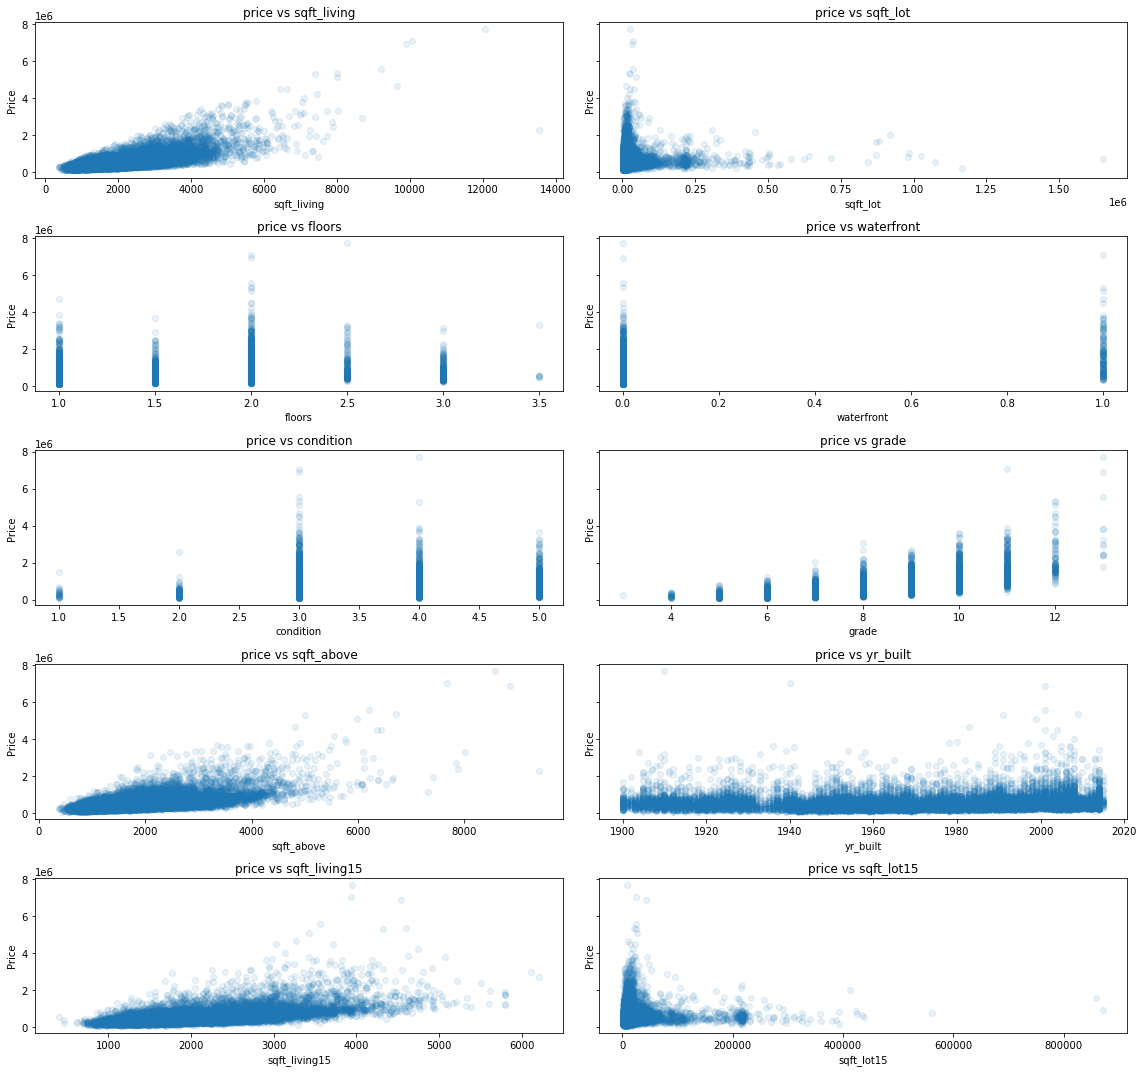

In [48]:
#scatter plot showing relationship between target column and other column
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(16,15), sharey=True )

#simultaneously iterate through each column of data and through each of our axes making a plot for each step along the way
for ax, column in zip(axes.flatten(), housing_data.columns[3:]):
    ax.scatter(housing_data[column], housing_data['price'], label=column, alpha=.1)
    ax.set_title(f'price vs {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Price')
fig.tight_layout()

# Multicollinearity between variables

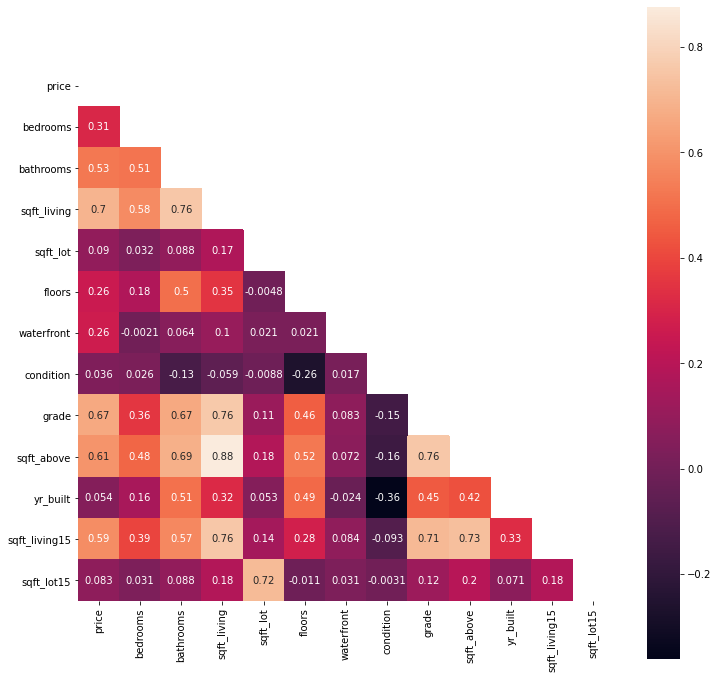

In [49]:
#heatmap showing the correlation of features
fig, ax = plt.subplots(figsize=(12, 12))
corr= housing_data.corr()
matrix = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=matrix, annot=True, square=True, ax=ax);

In [50]:
#checking for multcolliniiearity using a correlation threshold of 0.75
df = housing_data.corr().abs().stack().reset_index().sort_values(0, ascending=False)
df['pairs'] = list(zip(df.level_0, df.level_1))
df.set_index(['pairs'], inplace = True)
df.drop(columns=['level_1', 'level_0'], inplace = True)
df.columns = ['cc']
df.drop_duplicates(inplace=True)
df[(df.cc>.75) & (df.cc<1)]

,cc
pairs,
"(sqft_above, sqft_living)",0.87645
"(sqft_living, grade)",0.76278
"(sqft_living15, sqft_living)",0.75640
"(grade, sqft_above)",0.75607
"(bathrooms, sqft_living)",0.75576


In [51]:
#removing multicollinearity
housing_data = housing_data.drop(['bathrooms', 'sqft_above', 'sqft_living15', 'grade'], axis=1)

# 4.0 Linear Regression
This far, we have known that our analysis consists of more than one independent variable. As a result, we would like to ensure that the inputs or values of the independent variables satisfy the assumptions of linear regression.
The assumptions in linear regression are:
1. Linearity. The relationship between X and the mean of Y is linear
2. Normality. There is normal distribution between the x and y values
3. Homoscedasticity. The variance of residual is the same for any value of X
4. Independence. All observations are independent of each other.

# Splitting data into training and test test

In [52]:
y = housing_data[['price']]
X = housing_data.drop(['price'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

In [53]:
X_train.shape, X_test.shape

((17277, 8), (4320, 8))

In [54]:
y_train.shape, y_test.shape

((17277, 1), (4320, 1))

In [55]:
X_train.head()

,bedrooms,sqft_living,sqft_lot,floors,waterfront,condition,yr_built,sqft_lot15
2093,4,2130,2800,1.00000,0,5,1922,3990
9738,3,1160,3700,1.50000,0,3,1909,3750
4382,3,1820,15570,1.00000,0,3,1948,9480
11641,3,1660,8301,1.00000,0,5,1955,9489
13114,2,1390,1222,3.00000,0,3,2009,1369


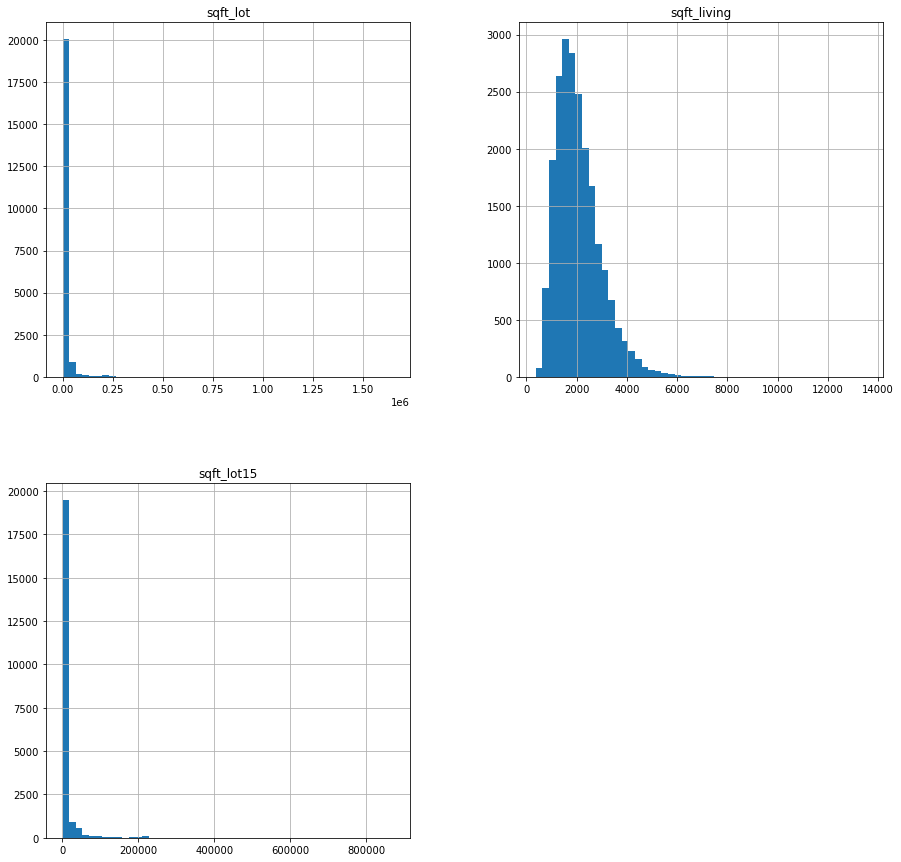

In [56]:
# histogram showing the distribution of continuous data
housing_data[['sqft_lot', 'sqft_living', 'sqft_lot15']].hist(figsize=[15,15], bins = 50);

From the histograms plotted above, we see that the distribution is not normal. And to perfor, our analysis, we need to have a normal distribution. Most of the distribution above is positively skewed and as a result, there is a longer tail on the right. In Linear Regression, the assumption is that the distribution is normal.
So we use a statistical technque, log transformation, to help us get our positively skewed distribution to normal distribution

# Log Transformation

In [57]:
log_columns = ['sqft_lot',  'sqft_living', 'sqft_lot15']
new_log_columns = [f'{column}_log' for column in X_train[log_columns].columns]

#log transform X train
log_X_train = np.log(X_train[log_columns])
log_X_train.columns =  new_log_columns

#log transform X test
log_X_test = np.log(X_test[log_columns])
log_X_test.columns =  new_log_columns

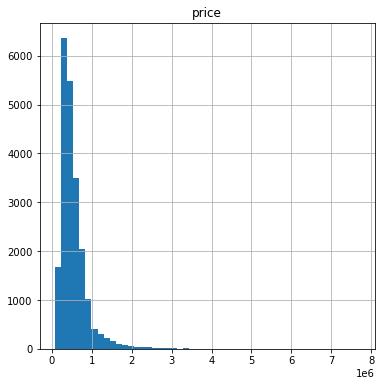

In [58]:
# histogram showing price distribution 
housing_data[['price']].hist(figsize=[6,6], bins = 50);

The dependent variable is also positively skewd, thus we will perform log tranformation to it as well.

In [59]:
log_X_train = pd.DataFrame((log_X_train), index=X_train.index)
log_X_test = pd.DataFrame((log_X_test), index=X_test.index)

In [60]:
#log transformation for y train
log_y_train = np.log(y_train['price'])
log_y_train.column =  'log_price'

#log transformation for y test
log_y_test = np.log(y_test['price'])
log_y_test.column =  'log_price'

In [62]:
#creating a data frame
log_y_train = pd.DataFrame((log_y_train), index=y_train.index)
log_y_test = pd.DataFrame((log_y_test), index=y_test.index)

# 5.0 Scaling

In [63]:
#scaling x train and x test
X_train_scaled = pd.DataFrame(StandardScaler().fit_transform(log_X_train), 
                               columns=log_X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(StandardScaler().fit_transform(log_X_test), 
                               columns=log_X_test.columns, index=X_test.index)

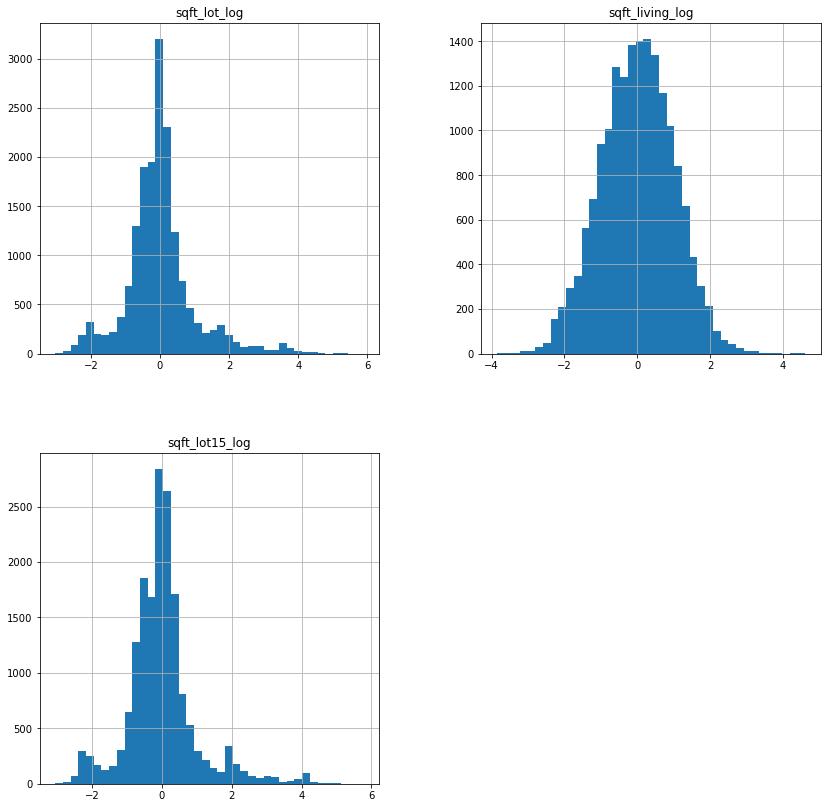

In [64]:
# distribution of continuous data after log transformation and scaling
X_train_scaled[new_log_columns].hist(figsize=[14,14], bins = 40);

In [65]:
# scaling y train and y test
y_train_scaled = pd.DataFrame(StandardScaler().fit_transform(log_y_train), 
                               columns=log_y_train.columns, index=y_train.index)
y_test_scaled = pd.DataFrame(StandardScaler().fit_transform(log_y_test), 
                               columns=log_y_test.columns, index=y_test.index)

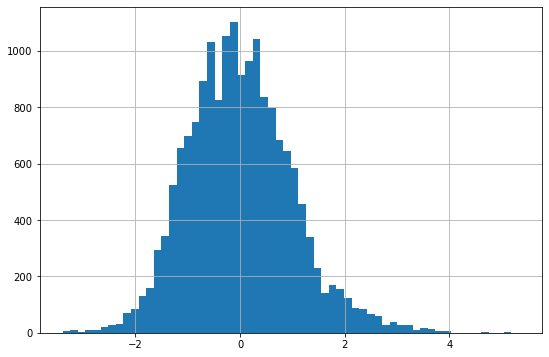

In [66]:
# distribution of price after log transformation and scaling
y_train_scaled['price'].hist(figsize=[9,6], bins = 60);

In [67]:
#replacing continous columns with scaled columns
final_X_train = pd.concat([X_train.drop(log_columns, axis=1), X_train_scaled], axis=1)
final_X_test = pd.concat([X_test.drop(log_columns, axis=1), X_test_scaled], axis=1)
final_X_train.head()

,bedrooms,floors,waterfront,condition,yr_built,sqft_lot_log,sqft_living_log,sqft_lot15_log
2093,4,1.00000,0,5,1922,-1.16827,0.26251,-0.82638
9738,3,1.50000,0,3,1909,-0.85955,-1.16898,-0.90251
4382,3,1.00000,0,3,1948,0.73219,-0.10799,0.23560
11641,3,1.00000,0,5,1955,0.03550,-0.32475,0.23676
13114,2,3.00000,0,3,2009,-2.08667,-0.74290,-2.13908


# Modelling

In [68]:
# model using price and sqft_living_log
model1 = sm.OLS(y_train_scaled, sm.add_constant(final_X_train[['sqft_living_log']])).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.455
Method:                 Least Squares   F-statistic:                 1.443e+04
Date:                Fri, 16 Dec 2022   Prob (F-statistic):               0.00
Time:                        12:48:16   Log-Likelihood:                -19269.
No. Observations:               17277   AIC:                         3.854e+04
Df Residuals:                   17275   BIC:                         3.856e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1.856e-16      0.006    3.3e-14      1.000      -0.011       0.011
sqft_living_log     0.6747      0.006    120.139      0.000       0.664       0.686
==============================================================================
Omnibus:                       98.440   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               92.340
Skew:                           0.148   Prob(JB):                     8.89e-21
Kurtosis:                       2.799   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [69]:
# MSE using the first model
model1 = LinearRegression()
model1.fit(final_X_train[['sqft_living_log']], y_train_scaled)
y_hat_train = model1.predict(final_X_train[['sqft_living_log']])
y_hat_test = model1.predict(final_X_test[['sqft_living_log']])
train_mse = mean_squared_error(y_train_scaled, y_hat_train)
test_mse = mean_squared_error(y_test_scaled, y_hat_test)
print(f'Train MSE: {train_mse}')
print(f'Test MSE: {test_mse}')

Train MSE: 0.5448075345744078
Test MSE: 0.5441084035365656


The difference between our training set and test set is very small. This is underfitting demonstrtated by thr model we have just created.

In [70]:
# Model using all features
model2 = sm.OLS(y_train_scaled, sm.add_constant(final_X_train)).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.534
Model:                            OLS   Adj. R-squared:                  0.534
Method:                 Least Squares   F-statistic:                     2478.
Date:                Fri, 16 Dec 2022   Prob (F-statistic):               0.00
Time:                        12:48:51   Log-Likelihood:                -17910.
No. Observations:               17277   AIC:                         3.584e+04
Df Residuals:                   17268   BIC:                         3.591e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              15.7099      0.437     35.925      0.000      14.853      16.567
bedrooms           -0.1419      0.007    -19.803      0.000      -0.156      -0.128
floors              0.2573      0.012     20.684      0.000       0.233       0.282
waterfront          1.2564      0.063     20.062      0.000       1.134       1.379
condition           0.0646      0.009      7.425      0.000       0.048       0.082
yr_built           -0.0080      0.000    -36.727      0.000      -0.008      -0.008
sqft_lot_log       -0.0754      0.014     -5.583      0.000      -0.102      -0.049
sqft_living_log     0.8090      0.008    103.195      0.000       0.794       0.824
sqft_lot15_log     -0.0095      0.013     -0.713      0.476      -0.036       0.017
==============================================================================
Omnibus:                       24.739   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.873
Skew:                           0.027   Prob(JB):                     5.37e-07
Kurtosis:                       3.193   Cond. No.                     1.66e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.66e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [71]:
# MSE for model 2 under all features
model2 = LinearRegression()
model2.fit(final_X_train, y_train_scaled)
y_hat_train = model2.predict(final_X_train)
y_hat_test = model2.predict(final_X_test)
train_mse = mean_squared_error(y_train_scaled, y_hat_train)
test_mse = mean_squared_error(y_test_scaled, y_hat_test)
print(f'Train MSE: {train_mse}')
print(f'Test MSE: {test_mse}')

Train MSE: 0.4655062537249349
Test MSE: 0.4773652013044243


# Using p-values to select features

The p-value helps us know our tolerance level for the model. If a p-value has a significance level of less than 0.05, then it means that the model is 95 percent accurate.
The variable with a p-value of more than 0.05 will not be used in our model

In [73]:
significant_features = ['bedrooms', 'floors', 'sqft_living_log', 'yr_built', 'condition',
                        'sqft_lot_log']
significant_X_train = final_X_train[significant_features]
significant_model = sm.OLS(y_train_scaled, sm.add_constant(significant_X_train)).fit()
significant_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.524
Model:                            OLS   Adj. R-squared:                  0.523
Method:                 Least Squares   F-statistic:                     3164.
Date:                Fri, 16 Dec 2022   Prob (F-statistic):               0.00
Time:                        12:52:04   Log-Likelihood:                -18109.
No. Observations:               17277   AIC:                         3.623e+04
Df Residuals:                   17270   BIC:                         3.629e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              16.2980      0.439     37.109      0.000      15.437      17.159
bedrooms           -0.1517      0.007    -20.991      0.000      -0.166      -0.138
floors              0.2655      0.013     21.154      0.000       0.241       0.290
sqft_living_log     0.8230      0.008    104.218      0.000       0.808       0.838
yr_built           -0.0083      0.000    -37.860      0.000      -0.009      -0.008
condition           0.0645      0.009      7.337      0.000       0.047       0.082
sqft_lot_log       -0.0787      0.006    -12.948      0.000      -0.091      -0.067
==============================================================================
Omnibus:                       61.027   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               73.624
Skew:                           0.076   Prob(JB):                     1.03e-16
Kurtosis:                       3.282   Cond. No.                     1.65e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [74]:
#using significant model to get MSE
significant_model = LinearRegression()
significant_model.fit(final_X_train[significant_features], y_train_scaled)
y_hat_train = significant_model.predict(final_X_train[significant_features])
y_hat_test = significant_model.predict(final_X_test[significant_features])
train_mse = mean_squared_error(y_train_scaled, y_hat_train)
test_mse = mean_squared_error(y_test_scaled, y_hat_test)
print(f'Train MSE: {train_mse}')
print(f'Test MSE: {test_mse}')

Train MSE: 0.47635771043780034
Test MSE: 0.48638661133577527


There is a very slight difference between my train MSE and the test MSE. This shows that our model is good.

# Using RFE

Recursive Feature Elimination reduces complexity by reducing one feature at a time until the optimal number of features is  left.

In [75]:
# selecting 3 best fetures
linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select=3)
selector = selector.fit(final_X_train, y_train_scaled)
selector.support_ 

array([False,  True,  True, False, False, False,  True, False])

In [76]:
#model using the three selected features
columns_selector = final_X_train.columns[selector.support_ ]
X_train_selector = final_X_train[columns_selector]
sm.OLS(y_train_scaled, sm.add_constant(X_train_selector)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.474
Model:                            OLS   Adj. R-squared:                  0.474
Method:                 Least Squares   F-statistic:                     5190.
Date:                Fri, 16 Dec 2022   Prob (F-statistic):               0.00
Time:                        12:53:15   Log-Likelihood:                -18964.
No. Observations:               17277   AIC:                         3.794e+04
Df Residuals:                   17273   BIC:                         3.797e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.2076      0.017    -11.949      0.000      -0.242      -0.174
floors              0.1319      0.011     11.988      0.000       0.110       0.153
waterfront          1.4488      0.066     21.908      0.000       1.319       1.578
sqft_living_log     0.6381      0.006    107.061      0.000       0.626       0.650
==============================================================================
Omnibus:                       94.598   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               82.878
Skew:                           0.120   Prob(JB):                     1.01e-18
Kurtosis:                       2.760   Cond. No.                         22.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [77]:
# intercept and coefficient of the model
estimators = selector.estimator_
print(estimators.coef_)
print(estimators.intercept_)

[[0.13187833 1.44880977 0.63813006]]
[-0.2076474]


From the assumptions stated in my notebook,under Linear Regression, in comparison with the two models, Model2 is so far the best model. Now we can plot and check for the prediction values

# Assumption on Linearity

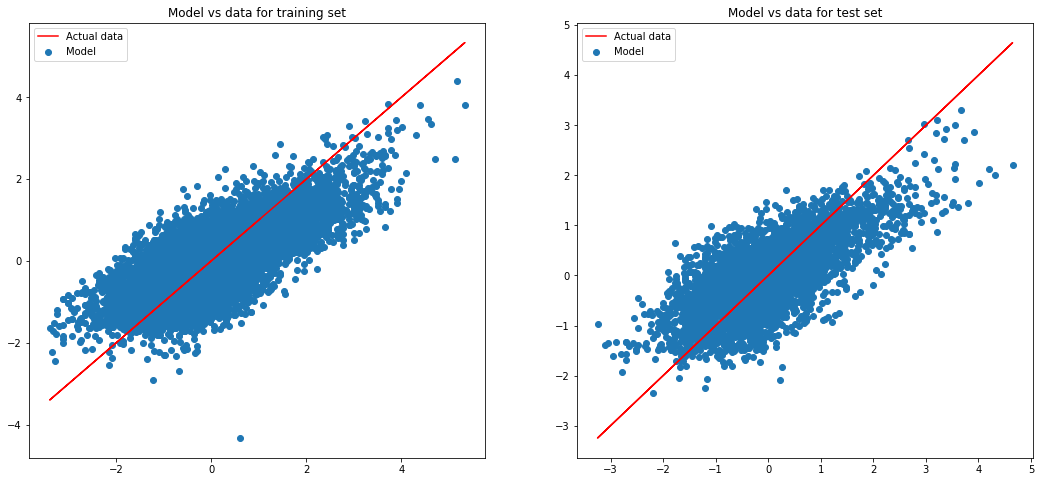

In [78]:
# scatter and line plots showing linearity
y_hat_test = model2.predict(final_X_test)
y_hat_train = model2.predict(final_X_train)
fig, axes = plt.subplots(ncols=2, figsize = (18,8))

#Train set
axes[0].scatter(y_train_scaled, y_hat_train, label='Model')
axes[0].plot(y_train_scaled['price'], y_train_scaled['price'], label='Actual data', color='red')
axes[0].set_title('Model vs data for training set')
axes[0].legend();

# Test set
axes[1].scatter(y_test_scaled, y_hat_test, label='Model')
axes[1].plot(y_test_scaled['price'], y_test_scaled['price'], label='Actual data',  color='red')
axes[1].set_title('Model vs data for test set')
axes[1].legend();

# Assumption of normal distribution

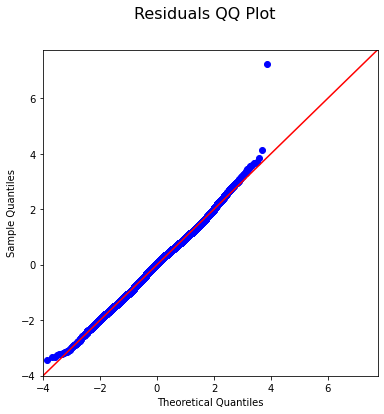

In [79]:
# assumption on normalities
fig, ax = plt.subplots(figsize=(6,6))
model2 = sm.OLS(y_train_scaled, sm.add_constant(final_X_train)).fit()
residuals = model2.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True, ax=ax)
fig.suptitle('Residuals QQ Plot', fontsize=16);

# Assumption on homoscedasticity

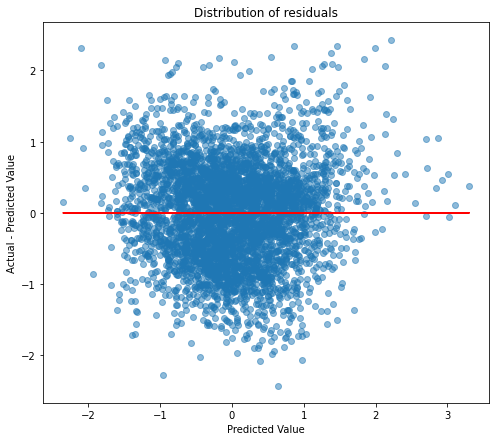

In [80]:
#plot showing homoscedascity
fig, ax = plt.subplots(figsize=(8,7))
residual = (y_test_scaled - y_hat_test)
model2 = sm.OLS(y_train_scaled, sm.add_constant(final_X_train)).fit()
ax.scatter(y_hat_test, residual, alpha=0.5)
ax.plot(y_hat_test, [0 for i in range(len(final_X_test))], color='red')
ax.set_xlabel("Predicted Value")
ax.set_ylabel("Actual - Predicted Value");
ax.set_title('Distribution of residuals');

# Conclusion

The model presented above will be used for predictive purposes and anybother inferential need that may arise in the agency company. The model has ticked all the boxes needed for linear regression, In that it has satisfied the assumption of linearity, normality and homoscedascticity. The model has also satisfied the assumption that all observed variables are independent of each other.
Through this model, we saw that as the amenities of the house increased, the prices increased. The squarefoots had a major impact to the price of the homes.

# Recommendation

From the conclusions above, we hughlighted the features that were more likely to influence the price of the house:
1. The higher the footage of the home, the higher the price value for the house.
2. The number of bedrooms. Houses with more number of bedrooms were more valued than those with ess
3. The number of floors. Houses with2-3 floors showed a higher price value than those with less 
4. The condition. Houses with better living conditions were highly valued.
5. Renovation affects the price of the houses in general
